## Problem Statement

#### Why does the Medical Insurance Companies even charge premium?? <br>

Charging premiums helps medical insurance companies in several ways. First and foremost, premiums are a source of revenue for the insurance company. The premiums that an insurance company collects from its customers are used to cover the costs of providing insurance coverage, as well as to generate a profit.

In addition to providing a source of revenue, charging premiums also helps medical insurance companies to manage risk. By setting premiums based on the medical profile of the customer, insurance companies are able to cover the risk of insuring that individual. Customers who are considered to be at a higher risk of experiencing a medical event that requires treatment will typically be charged a higher premium, while those who are considered to be at a lower risk will be charged a lower premium.

Charging premiums also helps medical insurance companies to remain financially stable. By setting premiums at a level that accurately reflects the risk level of insuring an individual, insurance companies can ensure that they have sufficient funds to cover the costs of any medical expenses that the insured person incurs. This helps to ensure the long-term financial stability of the insurance company.

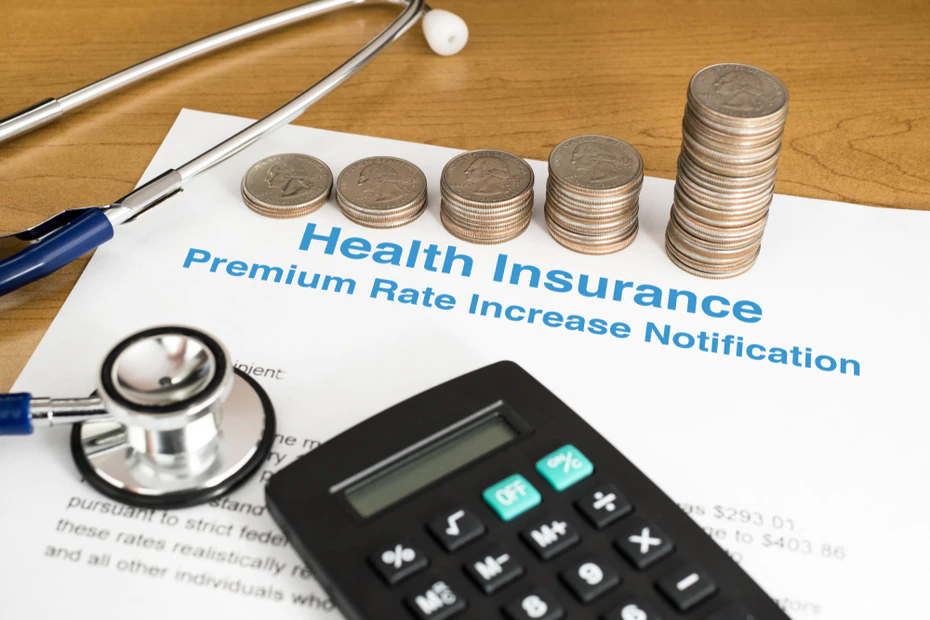

So what we can understand from above is that, charging premiums at correct level will ensure medical insurance company a lot of benefits. <br><br><b>Hence, what if we could accurately predict how much premium to charge based on the medical profile of a customer? </b> <br><br>
The ability to accurately predict how much premium to charge based on the medical profile of a customer could potentially provide significant benefits to a medical insurance company. It could help the company to more accurately assess and manage risk, attract more customers, and ensure the long-term financial stability of the company. <br><br>

So in this workbook, based on the dataset we have, which consists of medical information of about 1000 customers and their respective premium, we will make a **linear regression model** to predict how much premium should the company charge based on a medical information of customer with high accuracy.<br><br>

### Importing the libraries

In [1]:
# Importing the libraries and packages
import pandas as pd 
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

### Investigating the Data

In [2]:
# defining the dataframe
df = pd.read_csv("premium.csv")

In [3]:
#Understanding the last 5 records
df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


#### Understanding the dataset

<br>
<b>Number of records</b> : 985 rows * 11 rows 

<br> 
<b>Our Target Variable </b> : PremiumPrice

#### Expected Relation of features with the Premium Price

| **Feature**       | **Thoughts/Expectations**                     |
|------------------	|-------------------------------------------	|
| **Age:**    	| 	Positive correlation, as age increases, premium price is generally found to increase due to increased risk |
| **Diabetes:**    	| Positive correlation, studies have generally found that individuals with diabetes may have higher medical expenses for treatment |
| **Blood Pressure Problems:**    	| Positive correlation, individuals with blood pressure problems may be at an increased risk for heart or kidney disease, which can lead to higher medical expenses |
| **Transplant:**    	| Positive correlation, individuals who have had an organ transplant may be more likely to require medical treatment in the future, which can increase insurance premiums |
| **Chronic Diseases:**    	| Positive correlation, individuals with chronic diseases may have higher medical expenses for further treatment, which can affect insurance premiums |
| **Height:**    	| Neutral or no correlation, height is generally not found to have a significant impact on insurance premiums |
| **Weight:**    	| Neutral or no correlation, weight is generally not found to have a significant impact on insurance premiums |
| **Known Allergies:**    	| Neutral or no correlation, known allergies are generally not found to have a significant impact on insurance premiums |
| **History of Cancer in Family:**    	| Positive correlation, studies have generally found that individuals with a family history of cancer may be at an increased risk for developing certain types of cancer themselves, which can affect insurance premiums |
| **Number of Major Surgeries:**    	| Expect a positive correlation, as individuals who have had multiple major surgeries may be at an increased risk for future medical issues and may have higher medical expenses |

### Check Data Types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


**Observation** : Entire dataset has integers. Also we could see that there are no missing records, the dataset is complete

#### Let's remove duplicates before we move into EDA (Exploratory Data Analysis)

In [5]:
df.drop_duplicates(inplace = True)

### Exploratory Data Analysis (EDA) <br>
Exploratory Data Analysis (EDA) is a process of analyzing and summarizing a dataset in order to gain a better understanding of the data and the underlying patterns and relationships. It generates summary statistics, creating visualizations, and identifying outliers and other anomalies in the data. The goal of EDA is to provide a deeper understanding of the data and its characteristics, as well as to identify any potential problems or issues that may need to be addressed before proceeding with more advanced statistical analyses or feeding the data into a prediction model

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.00,41.75,13.96,18.00,30.00,42.00,53.00,66.00
Diabetes,986.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
BloodPressureProblems,986.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00
AnyTransplants,986.00,0.06,0.23,0.00,0.00,0.00,0.00,1.00
AnyChronicDiseases,986.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
Height,986.00,168.18,10.10,145.00,161.00,168.00,176.00,188.00
Weight,986.00,76.95,14.27,51.00,67.00,75.00,87.00,132.00
KnownAllergies,986.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
HistoryOfCancerInFamily,986.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
NumberOfMajorSurgeries,986.00,0.67,0.75,0.00,0.00,1.00,1.00,3.00


**Observation** : Age, Height, Weight and Premium Price are continous data whereas Diabetes, Blood Presure Problems, Transplants, Chronic Disease, Known Allergies, History of Cancer in Family are binary data. <br><br>
For continous data which are Age, Height, Weight,Number of Major Surgeries and Premium Price, they all look normally distributed as mean and median are almost same and no large standard deviation spotted. <br>
*But as always, lets validation these assumptions with visuals.*

#### Checking Data distribution of Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

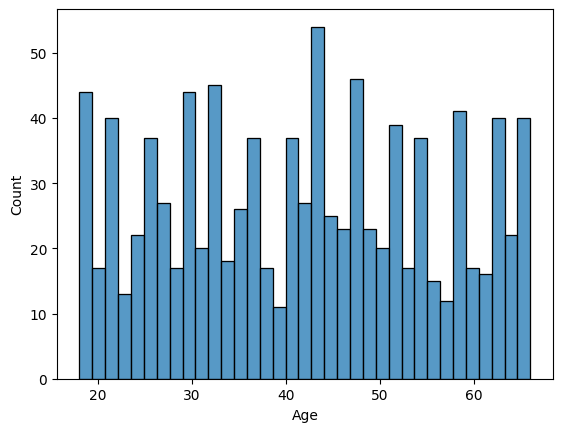

In [7]:
sns.histplot(df['Age'],bins = 35)

**Observation** : The data looks randomly distributed, means there is no pattern or biasness in the data.Also, No outliers detected

#### Checking Data distribution of Height


<AxesSubplot: xlabel='Height', ylabel='Count'>

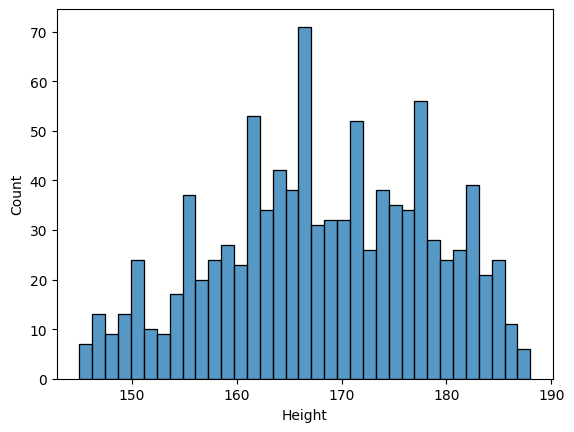

In [8]:
sns.histplot(df['Height'],bins=35)

The data looks normally distributed, No outliers detected

#### Checking Data Distribution for Weight

<AxesSubplot: xlabel='Weight', ylabel='Count'>

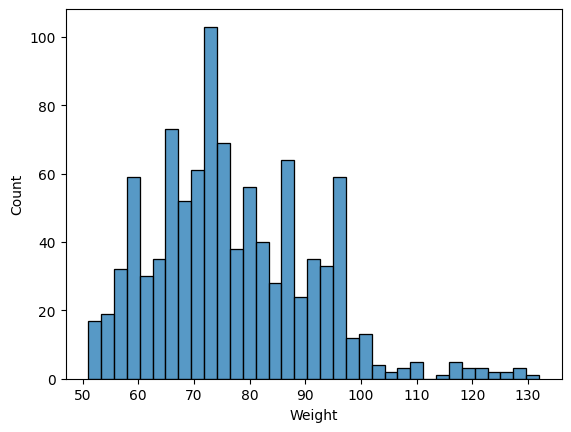

In [9]:
sns.histplot(df['Weight'],bins = 35)

**Observation**: We could see outliers in the dataset which is weight above 102. This was evident from the stats table above, the mean of weight is 77 and median is 75.. The data is skewed towards right due to outliers.. So, let's remove these records

In [10]:
#Removing Weights from dataframe which are greater than 102
df = df[df['Weight'] < 102]

In [11]:
# len(df['Weight'])

#### Checking Data Distribution for Premium Price

<AxesSubplot: xlabel='PremiumPrice', ylabel='Count'>

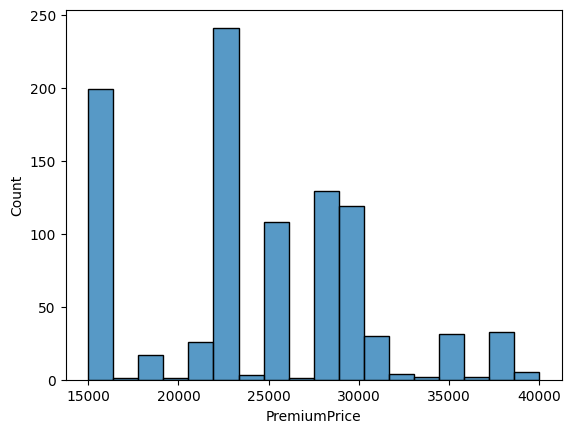

In [12]:
sns.histplot(df['PremiumPrice'])

### Now let's find out relationship between features which are continous in nature and Premium Price

#### Relationship b/w Premium Price and Weight

<AxesSubplot: xlabel='Weight', ylabel='PremiumPrice'>

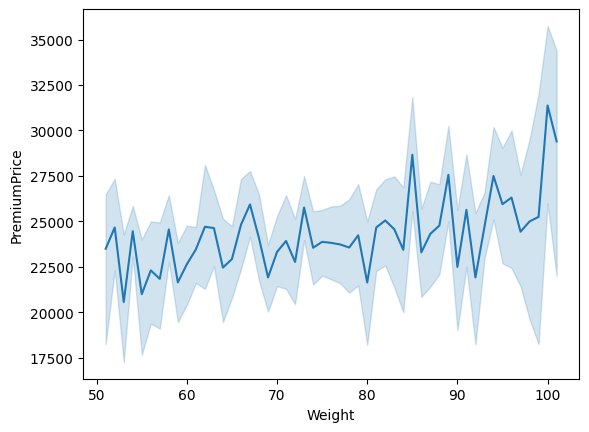

In [13]:
sns.lineplot(data=df,y ='PremiumPrice',x = 'Weight')

The plot shows that there is a weak but positive relationship between weight and premium price. This means that, in this dataset, higher weight is generally associated with higher insurance premiums, although the correlation is not particularly strong.


#### Relationship b/w Premium Price and Height

<AxesSubplot: xlabel='Height', ylabel='PremiumPrice'>

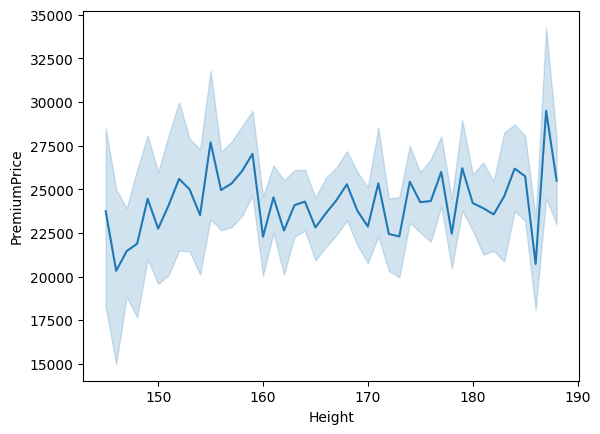

In [14]:
sns.lineplot(data=df,y ='PremiumPrice',x = 'Height')

The plot reveals that there is no significant correlation between height and premium price. This suggests that height is not a key factor influencing insurance premium costs in this dataset.

#### Relationship b/w Premium Price and Age

<AxesSubplot: xlabel='Age', ylabel='PremiumPrice'>

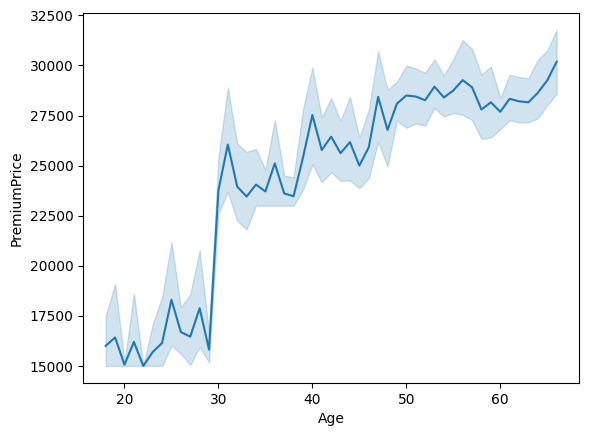

In [15]:
sns.lineplot(data=df, x='Age', y ='PremiumPrice')

The plot reveals a strong correlation between age and premium price, indicating that age is a major factor influencing insurance costs in this dataset. As age increases, we see a corresponding increase in premium price

#### Relationship b/w Premium Price and Number of Major Surgeries

<AxesSubplot: xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

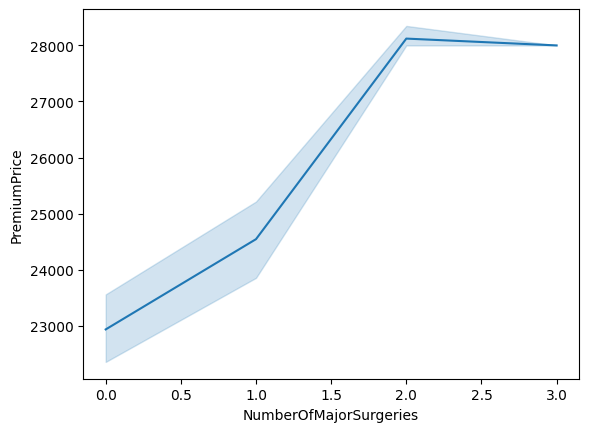

In [16]:
sns.lineplot(data = df, x = 'NumberOfMajorSurgeries', y = 'PremiumPrice')

This plot has uncovered a fascinating relationship between the number of surgeries and premium price. As the number of surgeries increases from none to 1 to 2, we see a corresponding increase in premium price. However, for number of surgeries greater than 2, the premium price tends to level off or even decrease slightly, indicating a complex and nuanced relationship between these variables.

### Now let's find out relationship between features which are binary in nature and Premium Price

In [17]:
df_temp = df[['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']]

global_mean = df['PremiumPrice'].mean()

for col in df_temp.columns:
    df_group = df.groupby(by=col).PremiumPrice.agg(['mean']).round(2)
    df_group['diff'] = (df_group['mean'] - global_mean).round(2)
    display(df_group)

,mean,diff
Diabetes,,
0,23816.03,-429.77
1,24831.27,585.47


,mean,diff
BloodPressureProblems,,
0,23237.62,-1008.18
1,25384.79,1138.99


,mean,diff
AnyTransplants,,
0,23790.88,-454.92
1,31962.26,7716.46


,mean,diff
AnyChronicDiseases,,
0,23624.68,-621.12
1,27022.99,2777.19


,mean,diff
KnownAllergies,,
0,24217.91,-27.89
1,24348.04,102.24


,mean,diff
HistoryOfCancerInFamily,,
0,24068.80,-177.00
1,25614.68,1368.88


**Diabetes:** Our analysis of the data has revealed a slight difference in insurance premiums between individuals with and without diabetes. This suggests that diabetes may not have a strong impact on insurance costs in this dataset, although it may be a contributing factor.<br>
**Blood Pressure Problems:** A similar slight difference in premiums is observed between those with and without blood pressure problems. This suggests that blood pressure problems may also be a minor factor in determining insurance costs.<br>
**Any Transplant:** The data shows a significant difference in premiums between individuals who have undergone a transplant and those who have not. This indicates that having a transplant may significantly impact the cost of insurance in this dataset.<br>
**Chronic Disease:** There is also a significant difference in premiums between individuals with and without chronic diseases. This suggests that chronic diseases may have a significant influence on insurance costs in this dataset.<br>
**Known Allergies:** In contrast, known allergies appear to have little effect on premiums, indicating that allergies may not be a major factor in determining insurance costs in this dataset.<br>
**History of Cancer in Family:** However, a family history of cancer may result in a slight difference in premiums. This suggests that a family history of cancer may have a small impact on insurance costs, but may not be a major determinant.


#### Let's perform last steps to drop redundant features from our dataset, before we feed data to our Model

In [18]:
#Dropping Height
df = df.drop('Height',axis = 1)

In [19]:
#Dropping Diabetes
df = df.drop('Diabetes',axis = 1)

In [20]:
#Dropping Known Allergies
df = df.drop('KnownAllergies',axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 985
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      952 non-null    int64
 1   BloodPressureProblems    952 non-null    int64
 2   AnyTransplants           952 non-null    int64
 3   AnyChronicDiseases       952 non-null    int64
 4   Weight                   952 non-null    int64
 5   HistoryOfCancerInFamily  952 non-null    int64
 6   NumberOfMajorSurgeries   952 non-null    int64
 7   PremiumPrice             952 non-null    int64
dtypes: int64(8)
memory usage: 66.9 KB


### Machine Learning

Let's define function which will calculate the performance metrics of our model

In [22]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

#### Splitting the data

In [23]:
# Defining the list of predictors
X = df.drop('PremiumPrice',axis=1)
y = df['PremiumPrice']

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

#### Linear Regression Model

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
train_test_metrics(X_train,X_test,y_train,y_test,model)

               Train          Test
R2              0.64          0.66
Adj-R2          0.64          0.65
MAE          2660.38       2567.90
MAPE           11.50         11.30
SSE    9598239483.10 3189051873.56


### Ridge Regression

In [25]:
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the model
model = Ridge()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid={'alpha': alphas}, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
best_alpha = best_params['alpha']

# Fit the model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Mape: {:.2f}".format(mape))
print("R2: {:.2f}".format(r2))

Mean Absolute Error: 2568.14
Mean Squared Error: 11151095.76
Mape: 0.11
R2: 0.66


Based on the results of the Ridge model, it appears that the model is able to predict the premium price for medical insurance with relatively good accuracy. The mean absolute error of 2568.14 suggests that, on average, the model is able to predict the premium price within $2568 of the actual value. The mean squared error of 11151095.76 and the mean absolute percentage error of 0.11 further indicate that the model is able to make relatively accurate predictions. the R2 value of **0.66** suggests that the model is able to explain approximately 66 % of the variance in the premium price.

One potential advantage of choosing the Ridge model over the Linear Regression model is that the Ridge model is able to reduce the magnitude of the coefficients of the features, which can help to reduce overfitting and improve the generalization of the model to unseen data. This can be especially beneficial when working with datasets that have high levels of multicollinearity, as is often the case with medical data.

Overall, the Ridge model appears to be a good choice for predicting the premium price for medical insurance based on the medical features of the customers. The model is able to make accurate predictions and has the added benefit of being able to mitigate the effects of multicollinearity. Therefore, it would be advisable to use the Ridge model for this task.

In [26]:
import joblib

# Save the model
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']

In [27]:
%%writefile app.py


import joblib
import pandas as pd
import streamlit as st

# Load the model
best_model = joblib.load('final_model.pkl')

st.title('Insurance Premium Prediction')

Age = st.number_input('Age', min_value=0, max_value=100)
Weight = st.number_input('Weight', min_value=0, max_value=500)
BloodPressureProblems = st.checkbox('Blood Pressure Problems')
AnyTransplants = st.checkbox('Transplant')
AnyChronicDiseases = st.checkbox('Chronic Diseases')
HistoryOfCancerInFamily = st.checkbox('Cancer History')
NumberOfMajorSurgeries = st.number_input('Number of Major Surgeries', min_value=0, max_value=10)

data = {
    'Age': Age,
    'Weight': Weight,
    'Blood Pressure Problems': BloodPressureProblems,
    'Transplant': AnyTransplants,
    'Chronic Diseases': AnyChronicDiseases,
    'Cancer History': HistoryOfCancerInFamily,
    'Number of Major Surgeries': NumberOfMajorSurgeries
}

input_df = pd.DataFrame(data, index=[0])

prediction = best_model.predict(input_df)[0]

st.write(f'The annual predicted insurance premium is: Rs {prediction:.2f}')

Overwriting app.py


In [ ]:
!streamlit run app.py                                                 # Launching the Streamlit web app!! We are all set :D 